# Homework 1 - Linear Regression

In this assignment, you will implement linear regression from scratch using only numpy. You will also derive the derivatives yourself (i.e., no autograd using PyTorch, TensorFlow, etc.) and implement gradient descent for training.


## Task 1: Inspect and Plot the Data

First, let's generate some data and plot it.

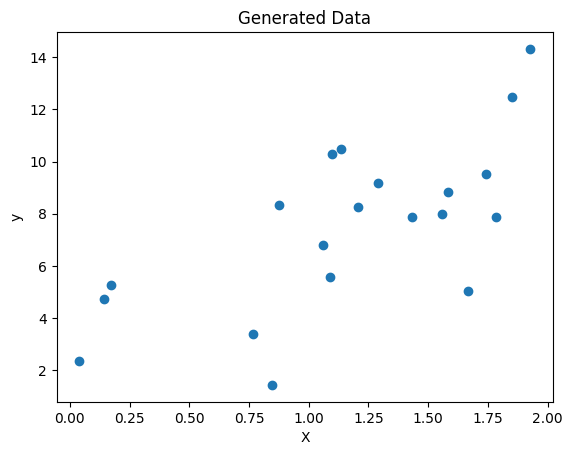

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
X = 2 * np.random.rand(20, 1)
y = 4 + 3 * X + 2*np.random.randn(20, 1)

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

## Task 2: Implement Linear Regression from Scratch

Linear regression models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. We will use gradient descent to train the model and derive the derivatives ourselves.

### Step 1: Initialize Parameters

Let's start by initializing the model parameters.

In [ ]:
# Initialize parameters
theta = np.random.randn(2, 1)
learning_rate = 0.1

### Step 2: Compute the Prediction and Loss (1 pt)

Implement the function to compute the predictions and the squared-error loss function.

In [ ]:
# Add x0 = 1 to each instance
X_b = np.c_[np.ones((20, 1)), X]

def predict(X, theta):
    #TODO: Implement the prediction function
    return X.dot(theta)

def compute_loss(y, y_pred):
    #TODO: Implement the loss function (remember to normalize by the size of the training set)
    return np.sum((y - y_pred) ** 2)/ 2 * len(y)

### Step 3: Compute the Gradient (0.5 pt)

Compute the gradient of the loss function with respect to the parameters.

In [ ]:
def compute_gradient(X, y, y_pred):
    #TODO: Implement the gradient function
    return -(1 / len(y)) * X.T.dot(y - y_pred)

### Step 4: Train the Model using Gradient Descent (0.5 pt)

Train the model using gradient descent and plot the loss over iterations. Come up with a stopping condition for training.

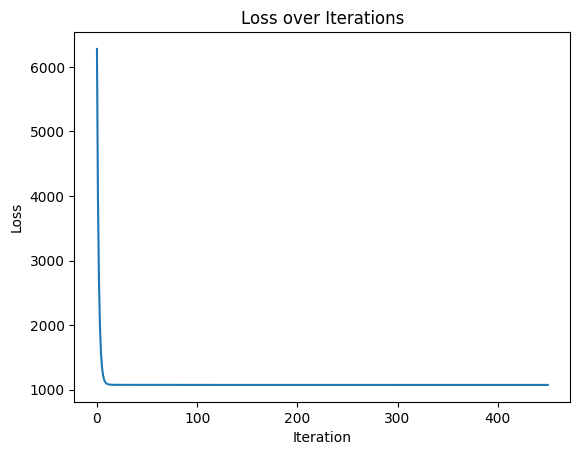

In [ ]:
def gradient_descent(X, y, theta, learning_rate, num_iterations, tol=1e-6):
    loss_history = []
    for i in range(num_iterations):
        y_pred = predict(X, theta)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        #TODO: Implement gradient descent
        gradients = compute_gradient(X, y, y_pred)

        theta = theta - learning_rate * gradients
        if i > 0 and abs(loss_history[-2] - loss_history[-1]) < tol:
            break

    return theta, loss_history

# Train the model
num_iterations = 1000
theta_gd, loss_history_gd = gradient_descent(X_b, y, theta, learning_rate, num_iterations)

# Plot the loss over iterations
plt.plot(loss_history_gd)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

### Step 5: Plot the Regression Line (0.5 pt)

Plot the regression line obtained from gradient descent along with the original data.

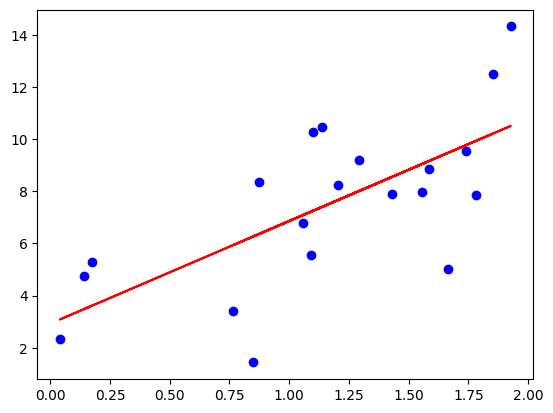

In [ ]:
# TODO: Create a plot of the regression line
plt.scatter(X, y, c= 'blue')
plt.plot(X, predict(X_b, theta_gd), color = 'red')

## Task 3: Using L1 Loss

Next, you will implement a regression model using L1 loss function instead of the squared-error (L2) loss function. This criterion is also known as [Least Absolute Deviation](https://https://en.wikipedia.org/wiki/Least_absolute_deviations) (LAD), in contrast with Minimum Squared Error (MSE) Objective. Models trained for LAD can be more robust and less sensitive to outliers.

Implementing this will only require small changes to the model you just developed. Mostly, this will involve changing the loss function and its gradient (since the gradient computation for L1 is slightly tricky, the function for calculating the gradient has already been implemented for you). Train the model using gradient descent and compare the results.

### Step 1: Implement L1 Loss Function (1 pt)

Implement the L1 loss function and its gradient.

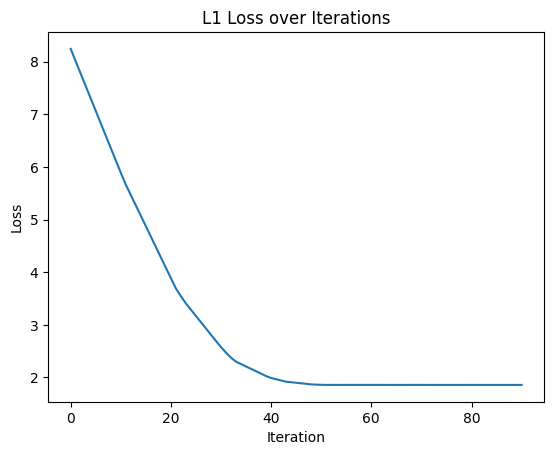

In [ ]:
def compute_l1_loss(y, y_pred):
    #TODO: Implement the L1 loss function
    return np.mean(np.abs(y - y_pred))

def compute_l1_gradient(X, y, y_pred):
    return X.T.dot(np.sign(y_pred - y)) / len(y)

def gradient_descent_l1(X, y, theta, learning_rate, num_iterations, tol=1e-6):
    loss_history = []
    for i in range(num_iterations):
        y_pred = predict(X, theta)
        loss = compute_l1_loss(y, y_pred)
        loss_history.append(loss)
        #TODO: Implement gradient steps
        gradient = compute_l1_gradient(X, y, y_pred)

        theta -= learning_rate * gradient

        if i > 0 and abs(loss_history[-2] - loss_history[-1]) < tol:
            break

    return theta, loss_history

# Train the model using L1 loss
theta = np.random.randn(2, 1)  # reinitialize parameters
theta_l1, loss_history_l1 = gradient_descent_l1(X_b, y, theta, learning_rate, num_iterations)

# Plot the L1 loss over iterations
plt.plot(loss_history_l1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('L1 Loss over Iterations')
plt.show()

### Step 2: Plot the Regression Line for L1 Loss (0.5 pt)

Plot the regression line obtained from gradient descent using L1 loss along with the original data.

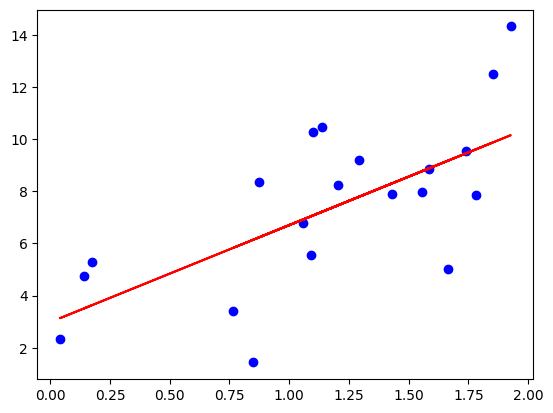

In [ ]:
# TODO: Create a plot of the regression line for the L1 loss
plt.scatter(X, y, c= 'blue')
plt.plot(X, predict(X_b, theta_l1), color = 'red')

Congratulations! You have successfully implemented linear regression from scratch using both squared-error loss and L1 loss, and trained the model using gradient descent.